In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
#Dependent feature
y = np.asarray(dataset['Salary'].values.tolist()) 

# Independent Feature
X = np.asarray(dataset['Level'].values.tolist())

In [5]:
X = X.reshape(-1,1)

In [6]:
y = y.reshape(len(y),1) # Changing the shape from (50,) to (50,1)


In [7]:
def poly_features(features, X):
  data = pd.DataFrame(np.zeros((X.shape[0],features)))
  for i in range(1,features+1):
    data.iloc[:,i-1] = (X**i).reshape(-1,1)
  X_poly = np.array(data.values.tolist())
  return X_poly

In [8]:
def split_data(X,y,test_size=0.2,random_state=0):
    np.random.seed(random_state)                  #set the seed for reproducible results
    indices = np.random.permutation(len(X))       #shuffling the indices
    data_test_size = int(X.shape[0] * test_size)  #Get the test size

    #Separating the Independent and Dependent features into the Train and Test Set
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [9]:
def pred_to_plot(W_trained, X):
  prediction_values = list()
  for i in range(X.shape[0]):
    value = regressor.predict(W_trained,X[i])
    prediction_values.append(value)
  return prediction_values

In [10]:
class polynomialRegression():

  def __init__(self):
    #No instance Variables required
    pass

  def forward(self,X,y,W):
    """
    Parameters:
    X (array) : Independent Features
    y (array) : Dependent Features/ Target Variable
    W (array) : Weights 

    Returns:
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    y_pred (array) : Predicted Target Variable
    """
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):
    """
    Parameters:
    X (array) : Independent Features
    y_pred (array) : Predicted Target Variable
    y_true (array) : Dependent Features/ Target Variable
    W (array) : Weights
    alpha (float) : learning rate
    index (int) : Index to fetch the corresponding values of W, X and y 

    Returns:
    W (array) : Update Values of Weight
    """
    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W

  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    """
    Parameters:
    X (array) : Independent Feature
    y (array) : Dependent Features/ Target Variable
    epochs (int) : Number of epochs for training, default value is 10
    alpha (float) : learning rate, default value is 0.001

    Returns:
    y_pred (array) : Predicted Target Variable
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    """

    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns 
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):
    """
    Parameters:
    X_test (array) : Independent Features from the Test Set
    y_test (array) : Dependent Features/ Target Variable from the Test Set
    W_trained (array) : Trained Weights
    test_indices (list) : Index to fetch the corresponding values of W_trained,
                          X_test and y_test 

    Returns:
    test_pred (list) : Predicted Target Variable
    test_loss (list) : Calculated Sqaured Error Loss for y and y_pred
    """
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss
    

  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

  def plotLoss(self, loss, epochs):
    """
    Parameters:
    loss (list) : Calculated Sqaured Error Loss for y and y_pred
    epochs (list): Number of Epochs

    Returns: None
    Plots a graph of Loss vs Epochs
    """
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()
  

In [11]:
X = np.asarray(dataset['Level'].values.tolist())

In [12]:
X = X.reshape(-1,1)

In [13]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [14]:
X = poly_features(2,X)

/var/folders/lb/_lc8jsw57gg97jlqvd8bn5x80000gn/T/ipykernel_28117/86361913.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.iloc[:,i-1] = (X**i).reshape(-1,1)


In [15]:
#Adding the feature X0 = 1, so we have the equation: y =  W0 + (W1 * X1) + (W2 * (X1**2))
X = np.concatenate((X,np.ones((10,1))), axis = 1)


In [16]:
X

array([[  1.,   1.,   1.],
       [  2.,   4.,   1.],
       [  3.,   9.,   1.],
       [  4.,  16.,   1.],
       [  5.,  25.,   1.],
       [  6.,  36.,   1.],
       [  7.,  49.,   1.],
       [  8.,  64.,   1.],
       [  9.,  81.,   1.],
       [ 10., 100.,   1.]])

In [17]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [24]:
X_train, y_train, X_test, y_test = split_data(X,y)

In [25]:
regressor = polynomialRegression()

In [28]:
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=200, alpha=0.00001)


In [29]:
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)


In [30]:
pred_plot = pred_to_plot(W_trained,X)

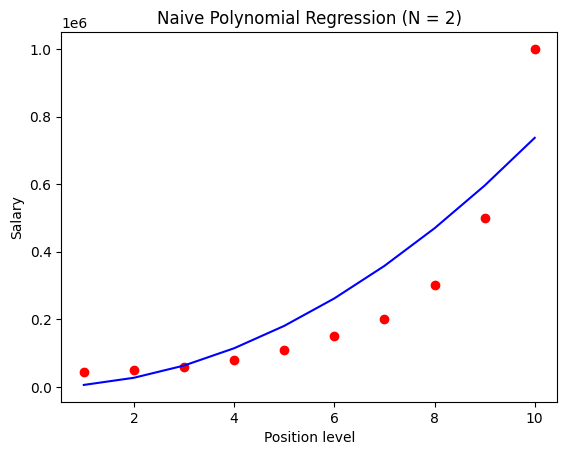

In [31]:
plt.scatter(X[:,0], y, color = 'red')
plt.plot(X[:,0], pred_plot, color = 'blue')
plt.title('Naive Polynomial Regression (N = 2)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [32]:
X = np.asarray(dataset['Level'].values.tolist())

In [33]:
X = X.reshape(-1,1)


In [34]:
X_poly = poly_features(4,X)

/var/folders/lb/_lc8jsw57gg97jlqvd8bn5x80000gn/T/ipykernel_28117/86361913.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.iloc[:,i-1] = (X**i).reshape(-1,1)


In [35]:
X_poly = np.concatenate((X_poly,np.ones((10,1))), axis = 1)


In [36]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 1.000e+00],
       [3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01, 1.000e+00],
       [4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02, 1.000e+00],
       [5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02, 1.000e+00],
       [6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03, 1.000e+00],
       [7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03, 1.000e+00],
       [8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03, 1.000e+00],
       [9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03, 1.000e+00],
       [1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04, 1.000e+00]])

In [37]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [38]:
X_train, y_train, X_test, y_test = split_data(X_poly,y)

In [39]:
regressor = polynomialRegression()

In [40]:
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=1000, alpha=1e-9)


In [41]:
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)


In [42]:
X_poly


array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 1.000e+00],
       [3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01, 1.000e+00],
       [4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02, 1.000e+00],
       [5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02, 1.000e+00],
       [6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03, 1.000e+00],
       [7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03, 1.000e+00],
       [8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03, 1.000e+00],
       [9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03, 1.000e+00],
       [1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04, 1.000e+00]])

In [43]:
pred_plot = pred_to_plot(W_trained,X_poly)

In [44]:
pred_plot

[101.56686988148302,
 1570.332736753576,
 7876.252690310476,
 24783.645533405484,
 60351.39230382515,
 124932.93627428928,
 231176.28295245094,
 394024.0000808964,
 630713.2176371454,
 960775.6278336504]

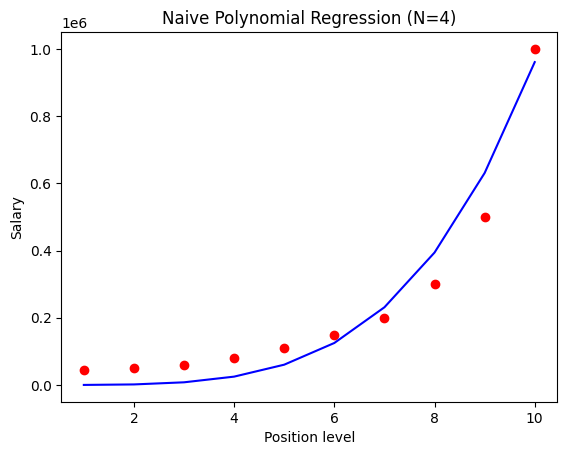

In [45]:
plt.scatter(X_poly[:,0], y, color = 'red')
plt.plot(X_poly[:,0], pred_plot, color = 'blue')
plt.title('Naive Polynomial Regression (N=4)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [47]:
X_sk = dataset.iloc[:, 1].values
y_sk = dataset.iloc[:, -1].values

In [48]:
X_sk = X_sk.reshape(-1,1)
y_sk = y_sk.reshape(-1,1)

In [49]:
# Constructing the polynomials of our Independent features 
poly_reg = PolynomialFeatures(degree = 4)
X_poly_sk = poly_reg.fit_transform(X_sk)

In [50]:
#Get the shapes of X and y
print("The shape of the independent fatures are ",X_poly_sk.shape)
print("The shape of the dependent fatures are ",y_sk.shape)

The shape of the independent fatures are  (10, 5)
The shape of the dependent fatures are  (10, 1)


In [51]:
X_poly_sk


array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [52]:
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X_poly_sk, y_sk, test_size = 0.2, random_state = 0)

In [53]:
regressor_sk = LinearRegression()
regressor_sk.fit(X_train_sk, y_train_sk)

LinearRegression()

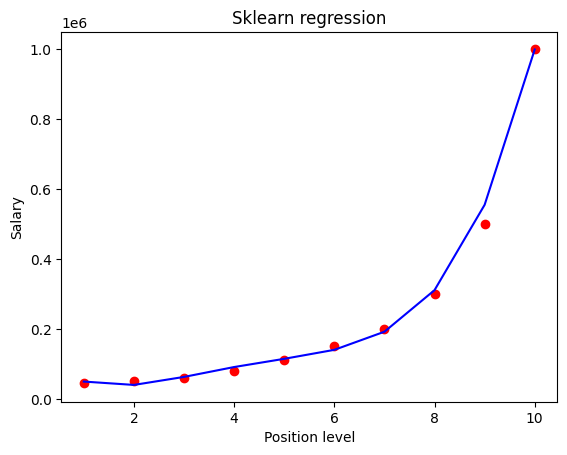

In [54]:
plt.scatter(X_poly_sk[:,1], y, color = 'red')
plt.plot(X_poly_sk[:,1], regressor_sk.predict(X_poly_sk), color = 'blue')
plt.title('Sklearn regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()